In [2]:
from fastai.text.all import *
from pathlib import Path
import pandas as pd
from random import choice
import re

In [2]:
path = Path('../data/')

In [3]:
df = pd.read_csv(path/'papers.csv'); df.head()

,Unnamed: 0,title,authors,doi,abstract,citations,pubdate,pubtype,proceedings,ccs
0,0,A meta-analysis of the impact of the inclusion and realism of human-like faces on user experiences in interfaces,"['Nick Yee', 'Jeremy N Bailenson', 'Kathryn Rickertsen']",https://doi.org/10.1145/1240624.1240626,"The use of embodied agents, defined as visual human-like representations accompanying a computer interface, is becoming prevalent in applications ranging from educational software to advertisements. In the current work, we assimilate previous empirical studies which compare interfaces with visually embodied agents to interfaces without agents, both using an informal, descriptive technique based on experimental results (46 studies) as well as a formal statistical meta-analysis (25 studies). Results revealed significantly larger effect sizes when analyzing subjective responses (i.e., questio...",93,April 2007,Article,CHI '07: Proceedings of the SIGCHI Conference on Human Factors in Computing Systems,"['Human-centered computing', 'Human computer interaction (HCI)']"
1,1,Session details: Faces & bodies in interaction,['Anne Anderson'],https://doi.org/10.1145/3258852,No abstract available.,0,April 2007,Section,CHI '07: Proceedings of the SIGCHI Conference on Human Factors in Computing Systems,[]
2,2,Improving recognition and characterization in groupware with rich embodiments,"['Tadeusz Stach', 'Carl Gutwin', 'David Pinelle', 'Pourang Irani']",https://doi.org/10.1145/1240624.1240627,"Embodiments are visual representations of people in a groupware system. Embodiments convey awareness information such as presence, location, and movement -- but they provide far less information than what is available from a real body in a face-to-face setting. As a result, it is often difficult to recognize and characterize other people in a groupware system without extensive communication. To address this problem, information-rich embodiments use ideas from multivariate information visualization to maximize the amount of information that is represented about a person. To investigate the ...",16,April 2007,Article,CHI '07: Proceedings of the SIGCHI Conference on Human Factors in Computing Systems,"['Human-centered computing', 'Collaborative and social computing', 'Collaborative and social computing theory, concepts and paradigms', 'Computer supported cooperative work', 'Social and professional topics', 'Professional topics', 'Computing and business', 'Computer supported cooperative work']"
3,3,Coordinating joint activity in avatar-mediated interaction,"['Robert J. Moore', 'E. Cabell Hankinson Gathman', 'Nicolas Ducheneaut', 'Eric Nickell']",https://doi.org/10.1145/1240624.1240628,"Massively multiplayer online games (MMOGs) currently represent the most widely used type of social 3D virtual worlds with millions of users worldwide. Although MMOGs take face-to-face conversation as their metaphor for user-to-user interaction, avatars currently give off much less information about what users are doing than real human bodies. Consequently, users routinely encounter slippages in coordination when engaging in joint courses of action. In this study, we analyze screen-capture video of user-to-user interaction in the game, City of Heroes, under two conditions: one with the game...",24,April 2007,Article,CHI '07: Proceedings of the SIGCHI Conference on Human Factors in Computing Systems,"['Human-centered computing', 'Collaborative and social computing', 'Collaborative and social computing systems and tools', 'Synchronous editors', 'Information systems', 'Information systems applications', 'Collaborative and social computing systems and tools', 'Synchronous editors']"
4,4,Industrial Design: Challenges and Successes Towards an integrated Product Development Process,"['David Gilmore', 'Jeremy Ashley', 'Tucker Viemeister', 'Tim Wood']",https://doi.org/10.1145/1240624.2180996,No abstract available.,0,April 2007,Article,CHI '07: Proceedings of the SIGCHI Conference on Human Fac

In [4]:
# df.abstract.replace('/[[\]]/g','',regex=True, inplace = True)

In [5]:
df = df[df.abstract != "No abstract available."].reset_index(drop=True); df.head()

,Unnamed: 0,title,authors,doi,abstract,citations,pubdate,pubtype,proceedings,ccs
0,0,A meta-analysis of the impact of the inclusion and realism of human-like faces on user experiences in interfaces,"['Nick Yee', 'Jeremy N Bailenson', 'Kathryn Rickertsen']",https://doi.org/10.1145/1240624.1240626,"The use of embodied agents, defined as visual human-like representations accompanying a computer interface, is becoming prevalent in applications ranging from educational software to advertisements. In the current work, we assimilate previous empirical studies which compare interfaces with visually embodied agents to interfaces without agents, both using an informal, descriptive technique based on experimental results (46 studies) as well as a formal statistical meta-analysis (25 studies). Results revealed significantly larger effect sizes when analyzing subjective responses (i.e., questio...",93,April 2007,Article,CHI '07: Proceedings of the SIGCHI Conference on Human Factors in Computing Systems,"['Human-centered computing', 'Human computer interaction (HCI)']"
1,2,Improving recognition and characterization in groupware with rich embodiments,"['Tadeusz Stach', 'Carl Gutwin', 'David Pinelle', 'Pourang Irani']",https://doi.org/10.1145/1240624.1240627,"Embodiments are visual representations of people in a groupware system. Embodiments convey awareness information such as presence, location, and movement -- but they provide far less information than what is available from a real body in a face-to-face setting. As a result, it is often difficult to recognize and characterize other people in a groupware system without extensive communication. To address this problem, information-rich embodiments use ideas from multivariate information visualization to maximize the amount of information that is represented about a person. To investigate the ...",16,April 2007,Article,CHI '07: Proceedings of the SIGCHI Conference on Human Factors in Computing Systems,"['Human-centered computing', 'Collaborative and social computing', 'Collaborative and social computing theory, concepts and paradigms', 'Computer supported cooperative work', 'Social and professional topics', 'Professional topics', 'Computing and business', 'Computer supported cooperative work']"
2,3,Coordinating joint activity in avatar-mediated interaction,"['Robert J. Moore', 'E. Cabell Hankinson Gathman', 'Nicolas Ducheneaut', 'Eric Nickell']",https://doi.org/10.1145/1240624.1240628,"Massively multiplayer online games (MMOGs) currently represent the most widely used type of social 3D virtual worlds with millions of users worldwide. Although MMOGs take face-to-face conversation as their metaphor for user-to-user interaction, avatars currently give off much less information about what users are doing than real human bodies. Consequently, users routinely encounter slippages in coordination when engaging in joint courses of action. In this study, we analyze screen-capture video of user-to-user interaction in the game, City of Heroes, under two conditions: one with the game...",24,April 2007,Article,CHI '07: Proceedings of the SIGCHI Conference on Human Factors in Computing Systems,"['Human-centered computing', 'Collaborative and social computing', 'Collaborative and social computing systems and tools', 'Synchronous editors', 'Information systems', 'Information systems applications', 'Collaborative and social computing systems and tools', 'Synchronous editors']"
3,36,How it works: a field study of non-technical users interacting with an intelligent system,"['Joe Tullio', 'Anind K. Dey', 'Jason Chalecki', 'James Fogarty']",https://doi.org/10.1145/1240624.1240630,"In order to develop intelligent systems that attain the trust of their users, it is important to understand how users perceive such systems and develop those perceptions over time. We present an investigation into how users come to understand an intelligent system as they use it in their daily work. During a six-week field study, we int

In [6]:
data_lm = TextDataLoaders.from_df(df, path, valid_pct=0.1, seed=7, text_col='abstract', is_lm=True)

/anaconda/envs/fastai2/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


In [ ]:
data_lm.show_batch()

In [7]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, metrics=[accuracy, Perplexity()], path=path, wd=0.1, drop_mult=0.2).to_fp16()

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=6.309573450380412e-07)

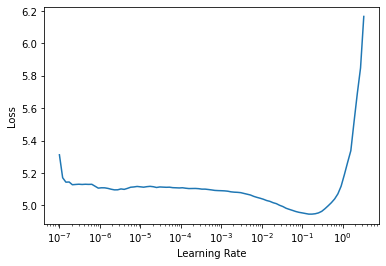

In [27]:
learn_lm.lr_find()

In [28]:
learn_lm.fit_one_cycle??

In [29]:
learn_lm.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.258344,4.022088,0.303494,55.817509,02:33


In [9]:
learn_lm.model_dir = '../models/design'

In [35]:
learn_lm.save('1epoch')

Path('../data/../models/design/1epoch.pth')

In [37]:
learn_lm.predict("What do you think", n_words=20)

'What do you think about outliers often go everywhere . We examine how users strive to observed data within objects . However'

In [10]:
learn_lm.load('4epochs')

In [42]:
learn_lm.unfreeze()

In [43]:
learn_lm.fit_one_cycle(3, 2e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.863764,3.944371,0.312952,51.643818,03:11
1,3.651252,3.843732,0.323296,46.699417,03:12
2,3.306215,3.858548,0.322826,47.396488,03:12


In [22]:
learn_lm.save('1epoch')

Path('../data/../models/design/1epoch.pth')

In [50]:
learn_lm.predict('The cube', n_words=20, temperature=0.7)

'The cube is a novel medium that can be combined with an interactive table that enables users to view the data and'

In [3]:
learn_lm = language_model_learner(data_lm, AWD_LSTM, metrics=[accuracy, Perplexity()], path=path, wd=0.2, drop_mult=0.3)

NameError: name 'data_lm' is not defined

SuggestedLRs(lr_min=0.017378008365631102, lr_steep=0.015848932787775993)

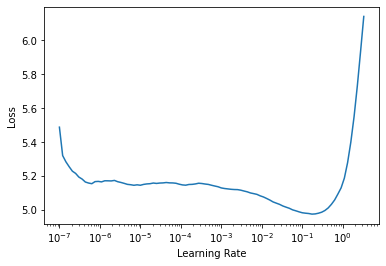

In [54]:
learn_lm.lr_find()

In [55]:
learn_lm.fit_one_cycle(1, 2e-2)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,4.304290,4.050635,0.304398,57.433907,01:47


In [56]:
learn_lm.unfreeze()
learn_lm.fit_one_cycle(3, 2e-3)

epoch,train_loss,valid_loss,accuracy,perplexity,time
0,3.945845,3.973041,0.310312,53.145916,02:13
1,3.759657,3.864102,0.321587,47.660461,02:14
2,3.471125,3.854045,0.323848,47.183533,02:14


In [20]:
learn_lm.predict('Recent user studies', n_words=1, temperature=0.7)

'Recent user studies and'

In [3]:
learn_lm.export('/home/advaitmb/notebooks/projects/PreDiction/models/design/4epochslearner.pkl')

NameError: name 'learn_lm' is not defined

In [48]:
learn = load_learner('/home/advaitmb/notebooks/projects/PreDiction/models/design/4epochslearner.pkl')

In [47]:
learn_hum = load_learner('/home/advaitmb/notebooks/projects/PreDiction/models/5epochslearner_v2.pkl')

In [6]:
learn.model


SequentialRNN(
  (0): AWD_LSTM(
    (encoder): Embedding(12304, 400, padding_idx=1)
    (encoder_dp): EmbeddingDropout(
      (emb): Embedding(12304, 400, padding_idx=1)
    )
    (rnns): ModuleList(
      (0): WeightDropout(
        (module): LSTM(400, 1152, batch_first=True)
      )
      (1): WeightDropout(
        (module): LSTM(1152, 1152, batch_first=True)
      )
      (2): WeightDropout(
        (module): LSTM(1152, 400, batch_first=True)
      )
    )
    (input_dp): RNNDropout()
    (hidden_dps): ModuleList(
      (0): RNNDropout()
      (1): RNNDropout()
      (2): RNNDropout()
    )
  )
  (1): LinearDecoder(
    (decoder): Linear(in_features=400, out_features=12304, bias=True)
    (output_dp): RNNDropout()
  )
)

In [7]:
def beam_search(learn, text:str, n_words:int, no_unk:bool=True, top_k:int=10, beam_sz:int=1000, temperature:float=1.,
                    sep:str=' ', decoder=decode_spec_tokens):
    learn.model.reset()
    learn.model.eval()
    idx = learn.dls.test_dl([text]).items[0][None]
    nodes = None
    nodes = idx.clone()
    scores = idx.new_zeros(1).float()
    if no_unk: unk_idx = learn.dls.vocab.index(UNK)
    with torch.no_grad():
        for k in progress_bar(range(n_words), leave=False):
            out = F.log_softmax(learn.model(idx)[0][:,-1], dim=-1)
            if no_unk: out[:, unk_idx] = -float('Inf')
            values, indices = out.topk(top_k, dim=-1)
            scores = (-values + scores[:,None]).view(-1)
            indices_idx = torch.arange(0,nodes.size(0))[:,None].expand(nodes.size(0), top_k).contiguous().view(-1)
            sort_idx = scores.argsort()[:beam_sz]
            scores = scores[sort_idx]
            nodes = torch.cat([nodes[:,None].expand(nodes.size(0),top_k,nodes.size(1)),
                                    indices[:,:,None].expand(nodes.size(0),top_k,1),], dim=2)
            nodes = nodes.view(-1, nodes.size(2))[sort_idx]
            learn.hidden = [(h[0][:,indices_idx[sort_idx],:],h[1][:,indices_idx[sort_idx],:]) for h in learn.model[0].hidden]
            idx = nodes[:,-1][:,None]
        if temperature != 1.: scores.div_(temperature)
        node_idx = torch.multinomial(torch.exp(-scores), 1).item()
        num = learn.dls.train_ds.numericalize
        tokens = [num.vocab[i] for i in nodes[node_idx][1:] if num.vocab[i] not in [BOS, PAD]]
        sep = learn.dls.train_ds.tokenizer.sep
        return sep.join(decoder(tokens))

In [71]:
text = 'We propose'


In [72]:
learn_hum.predict(text = text , n_words = 10, temperature = 0.7),'/n', learn.predict(text = text , n_words = 10, temperature = 0.7)

('We propose to the most beautiful man on the earth …',
 '/n',
 'We propose a new approach to interactive visual feedback for visually impaired')